<a href="https://colab.research.google.com/github/josueisaihs/PytorchTutorial/blob/main/intropytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [66]:
# Create a Model Class
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer (number of neurons) -->
  # H2 (n) -->
  # output (3 cases of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, output_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.output = nn.Linear(h2, output_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.output(x))

    return x

In [67]:
# Pick
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
my_df["species"] = my_df["species"].replace("setosa", 0.0)
my_df["species"] = my_df["species"].replace("versicolor", 1.0)
my_df["species"] = my_df["species"].replace("virginica", 2.0)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [71]:
X = my_df.drop('species', axis=1)
Y = my_df['species']
x = X.values
y = Y.values

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [73]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [75]:
from logging import critical
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0: print(f'Epoch {i} Loss {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 Loss 1.1251550912857056
Epoch 10 Loss 1.1094492673873901
Epoch 20 Loss 1.0956319570541382
Epoch 30 Loss 1.0833038091659546
Epoch 40 Loss 1.071068525314331
Epoch 50 Loss 1.0581413507461548
Epoch 60 Loss 1.0439516305923462
Epoch 70 Loss 1.027901530265808
Epoch 80 Loss 1.006042718887329
Epoch 90 Loss 0.9843574166297913
Epoch 100 Loss 0.9599509835243225
Epoch 110 Loss 0.933077871799469
Epoch 120 Loss 0.9046412110328674
Epoch 130 Loss 0.8755029439926147
Epoch 140 Loss 0.8462474346160889
Epoch 150 Loss 0.8167484998703003
Epoch 160 Loss 0.7871080636978149
Epoch 170 Loss 0.7566902041435242
Epoch 180 Loss 0.725196897983551
Epoch 190 Loss 0.6931911706924438
Epoch 200 Loss 0.6605445742607117
Epoch 210 Loss 0.627493679523468
Epoch 220 Loss 0.5974035859107971
Epoch 230 Loss 0.569082498550415
Epoch 240 Loss 0.5426393151283264
Epoch 250 Loss 0.5177791118621826
Epoch 260 Loss 0.4942725598812103
Epoch 270 Loss 0.4719048738479614
Epoch 280 Loss 0.4505511522293091
Epoch 290 Loss 0.430115878582000

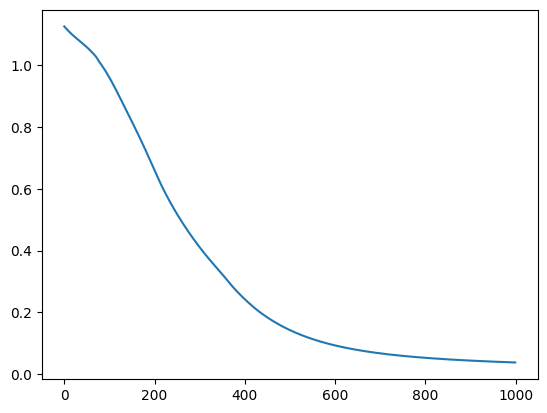

In [76]:
plt.plot(range(epochs), losses)

In [77]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [78]:
loss

tensor(0.1321)

In [80]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    print(f'[i+1].)\t{str(y_val)}\t{y_val.argmax().item()}-{y_test[i]}')
    if y_val.argmax().item() == y_test[i]: correct += 1

print(f'Correct {correct}/{len(x_test)}')

[i+1].)	tensor([0.0000, 5.6548, 8.1825])	2-2
[i+1].)	tensor([ 0.0000,  4.9443, 12.1875])	2-2
[i+1].)	tensor([ 0.0000,  6.3277, 12.9589])	2-2
[i+1].)	tensor([0.0000, 7.3690, 3.2443])	1-1
[i+1].)	tensor([ 0.0000,  6.0447, 10.4833])	2-2
[i+1].)	tensor([0.0000, 7.0109, 1.9832])	1-1
[i+1].)	tensor([0.0000, 6.3934, 7.5968])	2-2
[i+1].)	tensor([0.0000, 7.4004, 3.0010])	1-1
[i+1].)	tensor([0.0000, 6.1826, 8.9947])	2-2
[i+1].)	tensor([ 0.0000,  5.2006, 12.9501])	2-2
[i+1].)	tensor([0.0000, 6.2792, 7.0679])	2-2
[i+1].)	tensor([6.6059, 0.0000, 0.0000])	0-0
[i+1].)	tensor([6.0785, 0.0000, 0.0000])	0-0
[i+1].)	tensor([0.0450, 5.4600, 1.2403])	1-1
[i+1].)	tensor([5.3948, 0.9861, 0.0000])	0-0
[i+1].)	tensor([0.0000, 6.5466, 6.4161])	1-2
[i+1].)	tensor([5.9321, 0.2042, 0.0000])	0-0
[i+1].)	tensor([0.0000, 5.7566, 7.8107])	2-1
[i+1].)	tensor([6.3982, 0.0000, 0.0000])	0-0
[i+1].)	tensor([5.1420, 0.8147, 0.0000])	0-0
[i+1].)	tensor([0.0000, 6.0696, 1.5329])	1-1
[i+1].)	tensor([ 0.0000,  5.7454, 11.8745])

In [81]:
# Save
torch.save(model.state_dict(), 'my_iris_model.pt')

In [83]:
# Load
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)